# Data loading

In [1]:
#Importing all the essential Python libraries

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression

#for plotting

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For time stamps

from datetime import datetime

### Terminology

1. Share:
a share is a ‘part’ of a company which you can buy or sell, IF the company is publicly listed i.e. on a stock exchange.

2. Market Capitalization (Market Cap):
the total number of shares of a company multiplied by the price of a share.

3. Stocks:
refer to any arbitrary company. e.g. Akash owns Stocks

4. Shares:
referring to a specific company. e.g Saurabh owns shares of Coca-Cola Company

5. Portfolio:
If I have invested in more stocks than 1, let’s say 10 different stocks, then this collection of investment is known as a Portfolio.

6. Market Index:
identify a few companies to represent the broader markets.
So every time someone asks you how the markets are doing, you would just check the general trend of these selected stocks and then give an answer.
These companies that you have identified collectively make upthe stock market index.

7. Nifty:
Nifty is the market index which represents the top 50 companies listed on the NSE(National Stock Exchange)

8. Sensex:
Sensex is the market index which represents the top 30 companies listed on the BSE(Bombay Stock Exchange)

9. Trend:
A term ‘trend’ usually refers to the general market direction, and its associated strength. For example, if the market is declining fast, the trend is said to be bearish. If the market is trading flat with no movement then the trend is said to be sideways.

10. Volume (Total Traded Quantity):
Volumes represent the total transactions (both buy and sell put together) for a particular stock on a particular day. For example, on 17thJune 2019, the volume on ACC was 5,33,819 shares.

11. Turnover:
Product of total volume traded to the average price of a stock for that day

12. High:
high price of a stock for that day

13. Low:
high price of a stock for that day

14. Open:
price of a stock at the start of the day

15. Close:
price of a stock at the end of the day

16. Adj Close:
adjusted closing price amends a stock's closing price to reflect that stock's value after accounting for any corporate actions.
The closing price is the raw price, which is just the cash value of the last transacted price before the market closes. The adjusted closing price factors in anything that might affect the stock price after the market closes.factors such as stock splits, dividends, and rights offerings etc

### Q1. Why to invest in stocks 

#### Only 4.3 percent of indians invest in stock market - a far cry from the 50 per cent figure in the USA

- Most common ways of investment:-
1. Gold
2. Fixed deposite
3. PPF(Public provident fund)
4. Real Estate(But it is illiquid form of investment)
5. Stock Market

### Analysing `Compound Annual Growth Rate(CAGR)` on above forms of investments.  

Compound annual growth rate (CAGR), is the mean annual growth rate of an investment over a specified period of time longer than one year.

In [2]:
#function to calculate cagr

def cagr(initial_amount,final_amount,time):
    """Returns compound annual growth rate"""
    return round(((final_amount/initial_amount)**(1/time) - 1)*100,2)

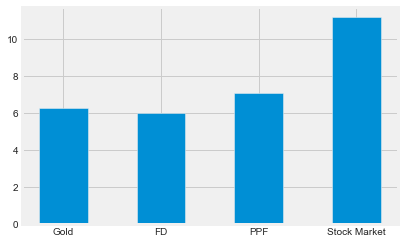

In [4]:
#analysing gold price

gold_prices_this_decade = [26400.00,31050.00,29600.00,28006.50,26343.50,28623.50,29667.50,31438.00,35220.00,48651.00]
gold_cagr = cagr(gold_prices_this_decade[0],gold_prices_this_decade[-1],10)

#gd and ppf has fixed intrest rates

fd_cagr = 6
ppf_cagr = 7.1

#analysis of stock market return 
#To get the basic idea of market for last decade we use index NIFTY50  data 
nifty50_data = pd.read_csv("NIFTY 50_Data.csv")
close_price = list(nifty50_data["Close"])
stock_cagr = cagr(close_price[0],close_price[-1],10)
stock_cagr

results = {"Gold" : gold_cagr,
           "FD" : fd_cagr,
           "PPF" : ppf_cagr,
           "Stock Market" : stock_cagr}
plt.bar(results.keys(),results.values(),width=0.5);

#### We can see that in last decade stock market returns out performs all other investment strategy and gives and average annual returns more that 11% without taking any high risk as its the return of nifty50 which is index of market. 

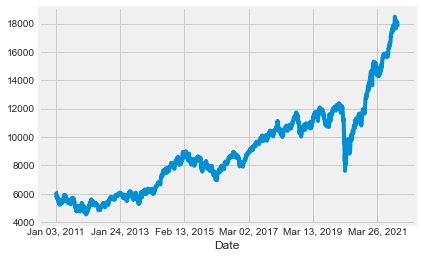

In [6]:
#Nifty50 last decade stock price

x = nifty50_data.set_index("Date")
x = x["Close"][::1]
x.plot();

### Analysis on the top companies

- These six top companies we found in previous notebook(from "top-6-large-cap.csv").
- We will do all analysis on these companies as they are best performing companies in their category.

In [7]:
#stocks we will use for  analysis

#names list is used to store stock names

names_list= ['LTI','MINDTREE','ASTRAL','DEEPAKNTR','PERSISTENT','NAUKRI']

#loading stocks data into dataframes

LTI=pd.read_csv(r'LTI.csv',parse_dates=['Date'])
MINDTREE=pd.read_csv(r'MINDTREE.csv',parse_dates=['Date'])
ASTRAL=pd.read_csv(r'ASTRAL.csv',parse_dates=['Date'])
DEEPAKNTR=pd.read_csv(r'DEEPAKNTR.csv',parse_dates=['Date'])
PERSISTENT=pd.read_csv(r'PERSISTENT.csv',parse_dates=['Date'])
NAUKRI=pd.read_csv(r'NAUKRI.csv',parse_dates=['Date'])
NIFTY=pd.read_csv(r'NIFTY.csv',parse_dates=['Date'])

In [8]:
#making date column as index of the data frames

LTI = LTI.set_index('Date')
LTI['Date']=LTI.index

MINDTREE= MINDTREE.set_index('Date')
MINDTREE['Date']=MINDTREE.index

ASTRAL = ASTRAL.set_index('Date')
ASTRAL['Date']=ASTRAL.index

DEEPAKNTR = DEEPAKNTR.set_index('Date')
DEEPAKNTR['Date']=DEEPAKNTR.index

PERSISTENT = PERSISTENT.set_index('Date')
PERSISTENT['Date']=PERSISTENT.index

NAUKRI = NAUKRI.set_index('Date')
NAUKRI['Date']=NAUKRI.index

NIFTY = NIFTY.set_index('Date')
NIFTY['Date']=NIFTY.index

In [9]:
#company list stores all the stocks dataframes

company_list = [LTI,MINDTREE,ASTRAL,DEEPAKNTR,PERSISTENT,NAUKRI]

#company name list stores the company names

company_name = ['Larsen & Toubro Infotech Limited','Mindtree Limited','Astral Limited','Deepak Nitrite Limited','Persistent Systems Limited','Info Edge Limited']

# overview of stocks  data

In [10]:
# Summary Stats

MINDTREE.describe()

,High,Low,Open,Close,Volume,Adj Close
count,737.000000,737.000000,737.000000,737.000000,7.370000e+02,737.000000
mean,1505.388602,1454.132157,1478.091588,1480.323270,1.201839e+06,1452.218440
std,1028.567271,990.081489,1007.239747,1009.939058,1.185409e+06,1020.148013
min,679.000000,652.050000,670.000000,667.600000,1.301410e+05,648.450000
25%,877.950000,843.900000,859.350000,861.850000,5.659930e+05,808.300000
50%,985.000000,972.150000,979.400000,979.600000,8.734120e+05,907.420000
75%,1759.450000,1705.650000,1729.800000,1734.750000,1.367888e+06,1719.390000
max,5039.100000,4905.000000,4950.000000,4988.950000,1.263725e+07,4988.950000


In [11]:
# General info

MINDTREE.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 737 entries, 2018-11-19 to 2021-11-17
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   High       737 non-null    float64       
 1   Low        737 non-null    float64       
 2   Open       737 non-null    float64       
 3   Close      737 non-null    float64       
 4   Volume     737 non-null    int64         
 5   Adj Close  737 non-null    float64       
 6   Date       737 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 46.1 KB


In [12]:
#Calculating the maximum, minimum and mean price for the last 90 days of each stock. (price=Closing Price)

count=0
for i in company_list:
    print(company_name[count])
    print(i.tail(90)['Close'].apply(['max', 'min', 'mean']))
    print()
    count+=1

Larsen & Toubro Infotech Limited
max     7397.050000
min     4017.850000
mean    5512.057778
Name: Close, dtype: float64

Mindtree Limited
max     4988.950000
min     2495.700000
mean    3771.451667
Name: Close, dtype: float64

Astral Limited
max     2382.750000
min     1966.250000
mean    2138.859444
Name: Close, dtype: float64

Deepak Nitrite Limited
max     2925.900000
min     1900.000000
mean    2292.783333
Name: Close, dtype: float64

Persistent Systems Limited
max     4316.45
min     2755.15
mean    3510.32
Name: Close, dtype: float64

Info Edge Limited
max     7019.500000
min     5085.950000
mean    6032.907222
Name: Close, dtype: float64



# data preprocessing:checking null values

In [13]:
count=0
for i in company_list:
    print(names_list[count])
    print(i.isna().sum())
    print()
    count+=1

LTI
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
Date         0
dtype: int64

MINDTREE
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
Date         0
dtype: int64

ASTRAL
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
Date         0
dtype: int64

DEEPAKNTR
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
Date         0
dtype: int64

PERSISTENT
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
Date         0
dtype: int64

NAUKRI
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
Date         0
dtype: int64



### there are no null values in our stock data

# data preprocessing: feature extraction

- `Simple Moving Average(SMA)` is an arithmetic moving average calculated by adding recent prices and then dividing that figure by the number of time periods in the calculation average. 

- Short-term averages respond quickly to changes in the price of the underlying security, while long-term averages are slower to react.

## SMA = $\frac{A_1 + A_2 + A_3 +....+ A_n}{n}$
### $A_n$ = Price of a asset at a period n
### n = No of total periods

In [14]:
# Calculating Moving average for 20 and 35 days of the stock price

ma_day = [20, 35]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

#### Adding a column 'Daily Return ' where the values are the daily change in percentages of stock price i.e. the percentage change between 2 consecutive day's closing prices

In [15]:
#pct_change finds the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change().fillna(value=0)*100

#### Adding another column 'Trend'(based on daily return) whose values are:

#### 'Slight or No change' for 'Daily Return' in between -0.5 and 0.5
#### 'Slight positive' for 'Daily Return' in between 0.5 and 1
#### 'Slight negative' for 'Daily Return' in between -0.5 and -1
#### 'Positive' for 'Daily Return' in between 1 and 3
#### 'Negative' for 'Daily Return' in between -1 and -3
#### 'Among top gainers' for 'Daily Return' in between 3 and 7
#### 'Among top losers' for 'Daily Return' in between -3 and -7
#### 'Bull run' for 'Daily Return' >7
#### 'Bear drop' for 'Daily Return' <-7

In [16]:
Category_bins = [-pd.np.inf, -7, -3, -1, -0.5, 0.5, 1, 3, 7, pd.np.inf]
Category_labels = ['Bear drop','Among top losers','Negative','Slight negative','Slight or No change','Slight positive','Positive','Among top gainers','Bull run']
for i in company_list:
    i['Trend'] = pd.cut(i['Daily Return'], bins=Category_bins, labels=Category_labels, include_lowest=True)

### VWAP (Volume Weighted Average Price) of a stock

#### The volume-weighted average price (VWAP) is a trading benchmark used by traders that gives the average price a stock has traded at throughout the day, based on both volume and price.

### VWAP = $ \frac{\sum Price * Volume}{\sum Volume}$

#### Large institutional buyers and mutual funds use the VWAP ratio to help move into or out of stocks. Therefore, when possible, institutions will try to buy below the VWAP, or sell above it.This way their actions push the price back toward the average, instead of away from it.

#### For example, when the price is above VWAP, Traders  may prefer to initiate long positions. When the price is below VWAP Traders may prefer to initiate short positions.

In [17]:
#In a separate list , calculating the monthwise VWAP (Volume Weighted Average Price ) of the stock.

for i in company_list:
    
    # Creating a new column ‘Year' in stock Dataframe
    
    i['Year'] = pd.DatetimeIndex(i['Date']).year
    
    # Creating a new column ‘Month' in stock Dataframe
    
    i['Month'] = pd.DatetimeIndex(i['Date']).month
    
    #calculating the price as average of high,low and close price
    
    i['Price']=(i['High']+i['Low']+i['Close'])/3
    
    #calculating turnover
    
    i['Turnover']=i['Price']*i['Volume']

#list to store the VWAP values

VWAP_monthwise=[]


for i in company_list:
    
    # VWAP_numerator calculation
    
    VWAP_numerator = i.groupby(by=['Year', 'Month']).Turnover.sum()
    
    # VWAP_denominator calculation
    
    VWAP_denominator = i.groupby(by=['Year', 'Month'])["Volume"].sum()
    
    #calculating vwap and appending it to the list
    
    VWAP_monthwise.append(VWAP_numerator / VWAP_denominator)

# 2. What was the change in price of the stock overtime?

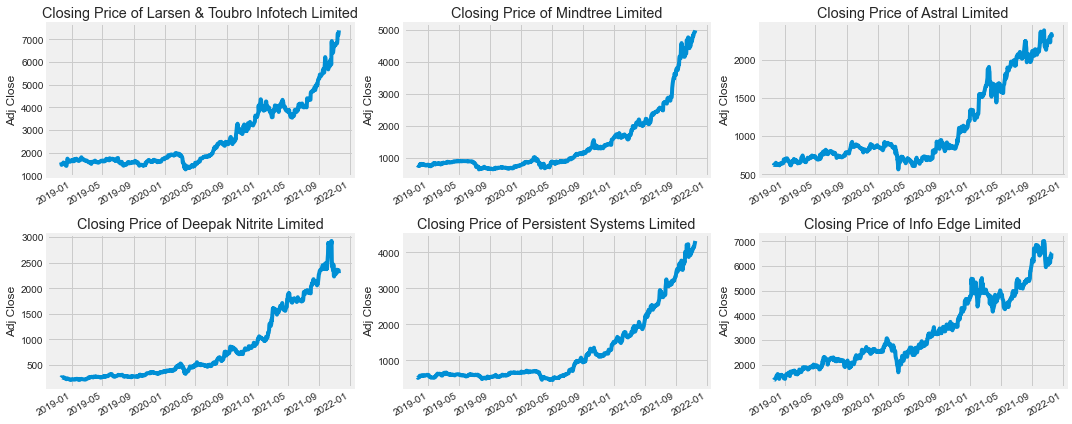

In [18]:
#Plotting Adjusted Closing price of each stock for the past 3 years

plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 3, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company_name[i - 1]}")
    
plt.tight_layout()

#### We can see that all these companies stocks value keeps on increasing in last three years as we expected because large cap companies are least volatile and gives us good returns.
#### Now lets find CAGR of some companies to get a better idea of returns these companies gives in last 3 years

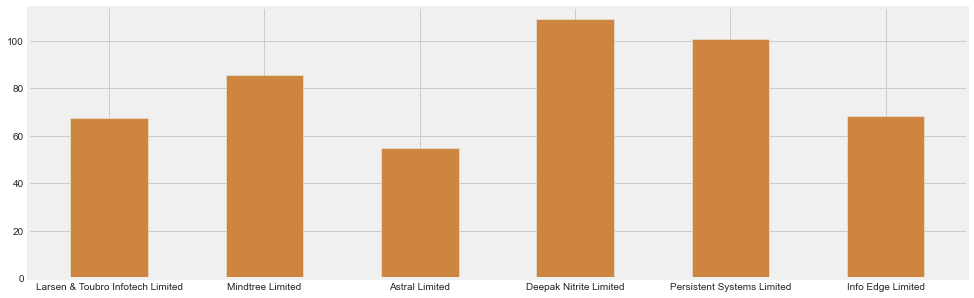

In [19]:
#calculating CAGR of each stock in the past 3 years

returns_dict = {}
for i, company in enumerate(company_list, 1):
    
    #getting starting 'adjusted closing' price
    
    s = company["Adj Close"][0]
    
    #getting final 'adjusted closing' price
    
    e = company["Adj Close"][-1]
    
    #calling cagr function with start and final price
    
    r = cagr(s,e,3)
    
    #storing the returned value in a dict
    
    returns_dict[company_name[i-1]] = r

plt.figure(figsize=(15,5))
plt.bar(returns_dict.keys(),returns_dict.values(),width=0.5,color="peru");

- Few observations from above analysis

1. Deepak nitrite gives more that 100% average annual returns in last three years. It is a chemical company and we all know that covid hit us last year and demand of chemical(life saving chemicals) increases rapidly and this can seen in the stock price of this company.

2. L&T, Mindtree, Persitent, Indo edge are IT companies and in covid time IT industry was on high as this industry won't effect much from the lockdown and people are working from home hence we can see their returns are high .

3. Astral Limited is pipe(related to construction) company we can observe that in 2020 it's stock price values decreases as because of lockdown constructio was stopped throughout the nation but in 2021 as lockdown removed and new and pending constuction was needed to be done we can see a high growth in its stock price and keeps on increasing.

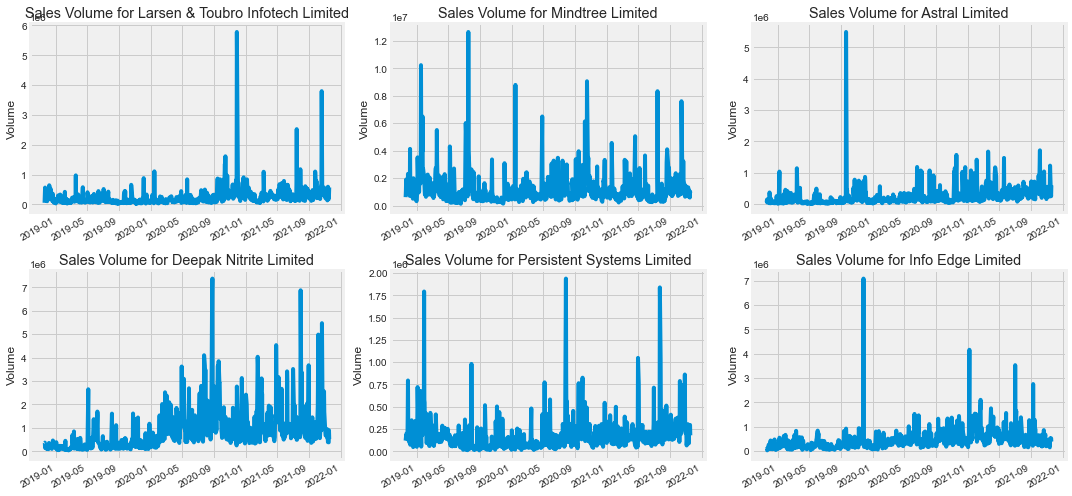

In [20]:
#Plotting the total volume of stock being traded each day

plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 3, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {company_name[i - 1]}")
    
plt.tight_layout()

#### Volume - Every transaction that takes place between a buyer and a seller of a stock contributes to the total volume count of that security. One transaction occurs whenever a buyer agrees to purchase what a seller is offering for sale at a certain price. If only five transactions occur in a day, the volume for that day is set at five.

#### we can see that Deepak Nitrite has high volume after mid 2020 because of covid people start investing in chemical industries as they are the most demanding during pandamic.

# 3.What was the simple moving average of the various stocks?

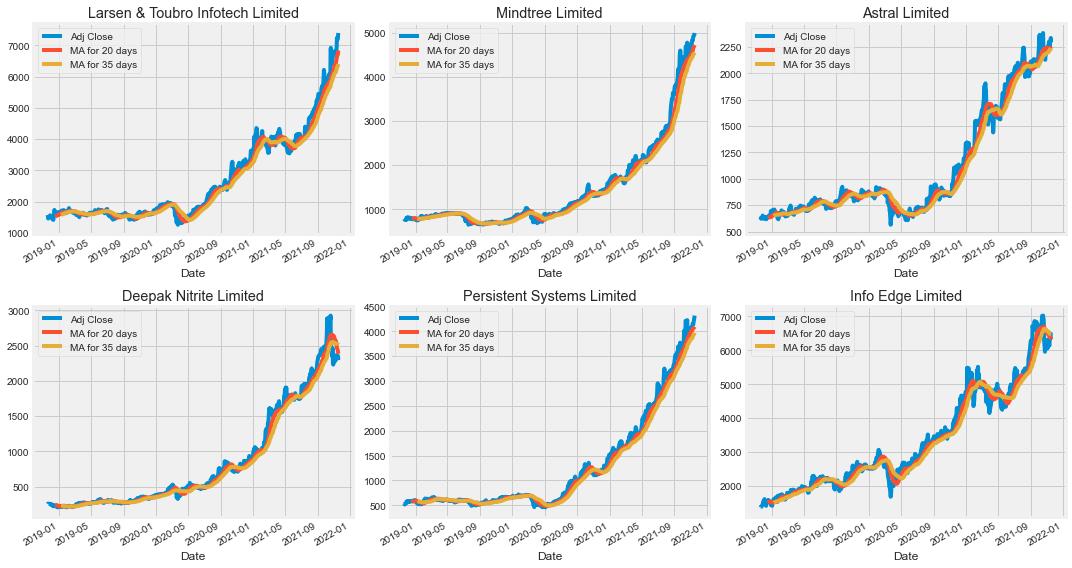

In [21]:
#plotting  the simple Moving Averages of each stock for the past 3 years

fig, axes = plt.subplots(nrows=2, ncols=3)
fig.set_figheight(8)
fig.set_figwidth(15)

LTI[['Adj Close', 'MA for 20 days', 'MA for 35 days']].plot(ax=axes[0,0])
axes[0,0].set_title(company_name[0])

MINDTREE[['Adj Close', 'MA for 20 days', 'MA for 35 days']].plot(ax=axes[0,1])
axes[0,1].set_title(company_name[1])

ASTRAL[['Adj Close', 'MA for 20 days', 'MA for 35 days']].plot(ax=axes[0,2])
axes[0,2].set_title(company_name[2])

DEEPAKNTR[['Adj Close', 'MA for 20 days', 'MA for 35 days']].plot(ax=axes[1,0])
axes[1,0].set_title(company_name[3])

PERSISTENT[['Adj Close', 'MA for 20 days', 'MA for 35 days']].plot(ax=axes[1,1])
axes[1,1].set_title(company_name[4])

NAUKRI[['Adj Close', 'MA for 20 days', 'MA for 35 days']].plot(ax=axes[1,2])
axes[1,2].set_title(company_name[5])
fig.tight_layout()

#### How to use it for buy or sell?
- When price crosses up and over the moving average ==> It's signal to Buy.
- When price crosses down and under the moving average ==> It's signal to Sell.

#### Trade Calls - Using Simple Moving Averages
#### Popular Trading Patterns
Two popular trading patterns that use simple moving averages include the death cross and a golden cross. A death cross occurs when the 50-day SMA crosses below the 200-day SMA. This is considered a bearish signal, that further losses are in store. The golden cross occurs when a short-term SMA breaks above a long-term SMA. Reinforced by high trading volumes, this can signal further gains are in store.

 Call should be buy whenever the smaller moving average (20) crosses over longer moving average (35) AND the call should be sell whenever smaller moving average crosses under longer moving average. One of the most widely used technical indicators.

# 4.What was the daily return of the stock on average?

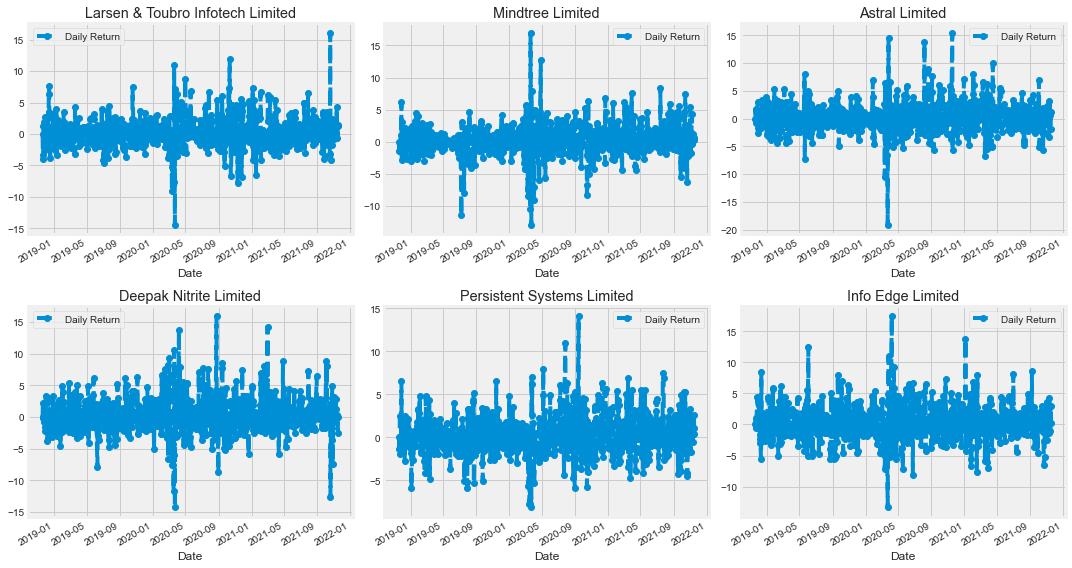

In [22]:
#plotting the daily return percentage of each stock in the past 3 years

fig, axes = plt.subplots(nrows=2, ncols=3)
fig.set_figheight(8)
fig.set_figwidth(15)

LTI['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title(company_name[0])

MINDTREE['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title(company_name[1])

ASTRAL['Daily Return'].plot(ax=axes[0,2], legend=True, linestyle='--', marker='o')
axes[0,2].set_title(company_name[2])

DEEPAKNTR['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title(company_name[3])

PERSISTENT['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title(company_name[4])

NAUKRI['Daily Return'].plot(ax=axes[1,2], legend=True, linestyle='--', marker='o')
axes[1,2].set_title(company_name[5])

fig.tight_layout()

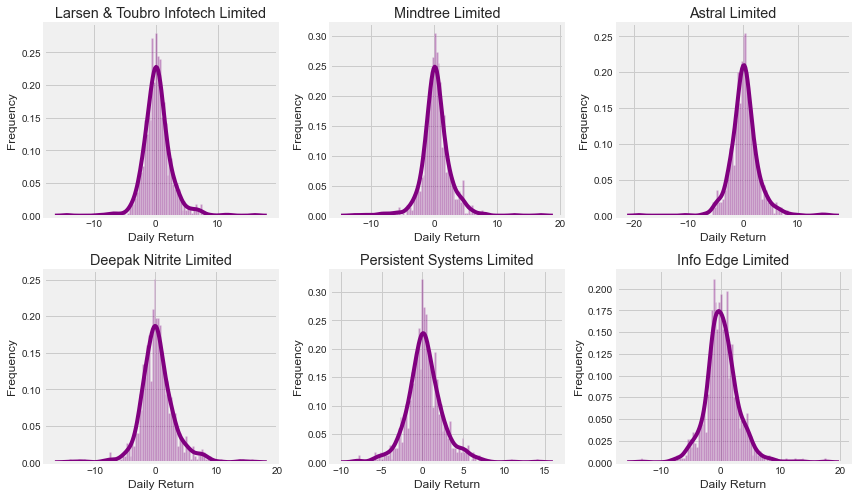

In [23]:
#histogram of average daily return of each stock for the past 3 years
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 3, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Frequency')
    plt.title(f'{company_name[i - 1]}')
plt.tight_layout()

#### Above histograms shows that daily returns of these companies are in a fixed range not too high not too low.
#### Hence we not need to check their performance too frequently we can check in a quarter or six month and then forget about them for next quarter.
#### So these are best form of investment for those who don't have much market knowledge.

# 5.Analysis of the relationship between volume and daily return

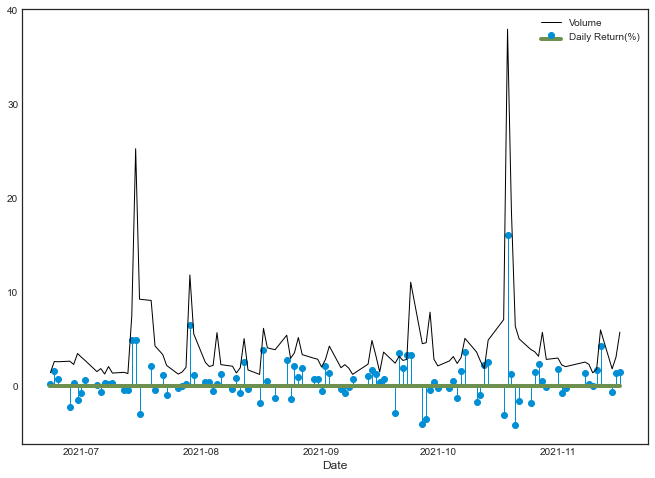

In [24]:
#plotting the volume and daily return of 'LTI' stock only for past 100 days(better for visualization and inferences)

with plt.style.context(plt.style.available[23]):
    plt.figure(figsize=(10,8))
    
    #plotting the daily return for past 100 days
    
    markerline, stemlines, baseline = plt.stem(company_list[0].tail(100).index, company_list[0]['Daily Return'].tail(100),label="Daily Return(%)", use_line_collection=True)
    plt.setp(stemlines, 'linewidth', 1)
    
    #plotting the volume for the past 100 days
    
    plt.plot(company_list[0].tail(100).index, company_list[0]["Volume"].tail(100).values/100000, color='k', linewidth=1, label="Volume")
    plt.xlabel("Date")
    plt.legend()
    plt.show()

here we are plotting only past 100 days data of only one stock to have a better understanding

#### When Volume sunddenly increase, It means Daily return either increased or decreased which affect Stock price directly.

#### E.g. When some news came up about company, it highly affect the stock price of the company
#### When there is good news about Company, People tend to buy the stock and stock price start to increase. Which means, at end of day Volume is large. It means Positive change happen in stock than previous day.
#### When there is bad news about Company, People tend to sell the stock and stock price start to decrease. Which means, at end of day Volume is large. It means negative change happen in stock than previous day.


# 6. What was the correlation between different stocks daily returns?

In [25]:
#creating a 'closing_df' dataframe to store  ajusted closing prices of all stocks

closing_df = pd.DataFrame(columns=names_list)

In [26]:
#adding the adjusted closing prices to the dataframe

for i in range(len(names_list)):
    closing_df[names_list[i]]=company_list[i]['Adj Close']

In [27]:
# Make a new tech returns(daily returns) DataFrame

tech_rets = closing_df.pct_change()

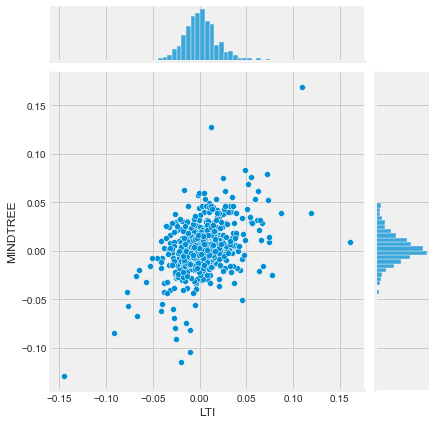

In [28]:
# comparing the daily returns of lti and mindtree
sns.jointplot('LTI', 'MINDTREE', tech_rets, kind='scatter')

#### we know that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.

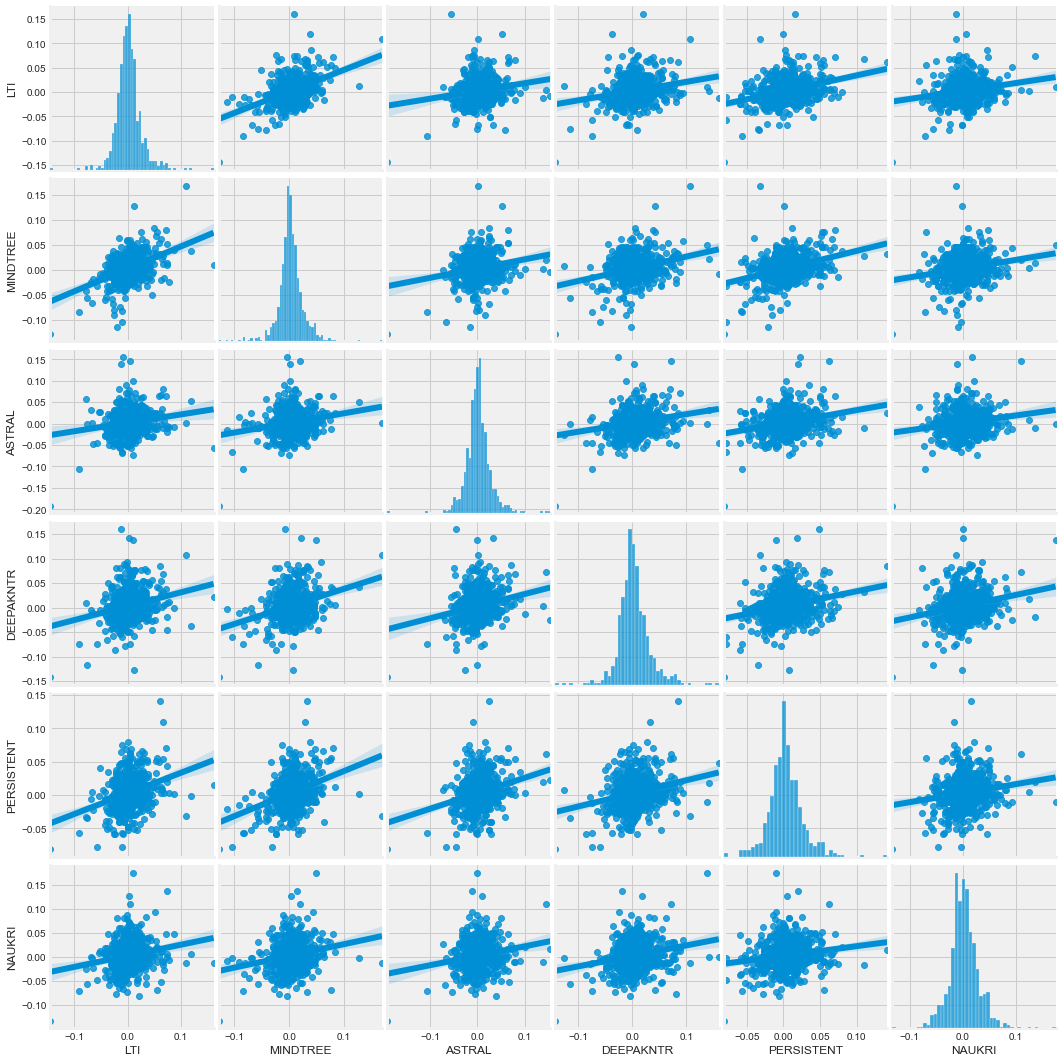

In [29]:
sns.pairplot(tech_rets, kind='reg');

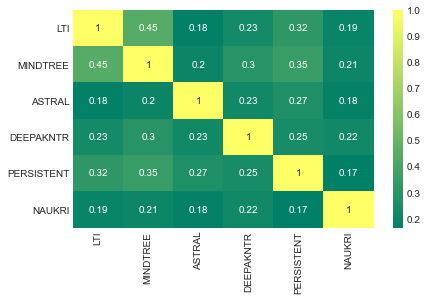

In [30]:
#heatmap of correlation between the daily returns

sns.heatmap(tech_rets.corr(), annot=True, cmap='summer');

#### There is no positive correlation between any two companies, means stock of one company do not affect / don't have relationship with other company.
#### Investor can freely invest in all company cause change in one stock not affect other.

#  7.risk by investing in a particular stock?

#### There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

### Volatility is the change in variance in the returns of a stock over a specific period of time
### In most cases, the higher the volatility, the riskier the security. Volatility is often measured as either the standard deviation or variance between returns from that same stock or market index.
### Volatile assets are often considered riskier than less volatile assets because the price is expected to be less predictable.

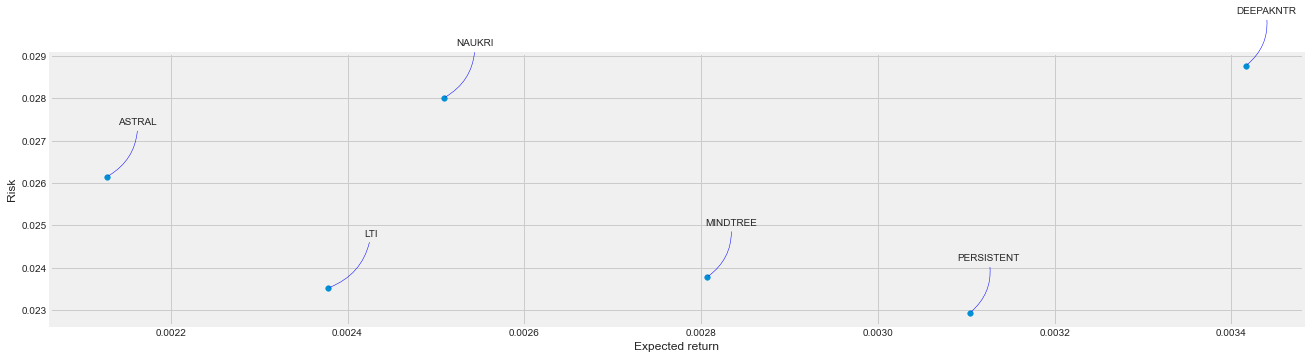

In [31]:
# Risk Analysis


rets = tech_rets.dropna()

area = np.pi * 10

plt.figure(figsize=(20, 5))

#plotting daily returns mean and daily returns sd

plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

- Conclusions:
1. All are largecap companies are stable and gives steady returns but still if we look above graph we can further comment on the relative risk and return for each company.
2. If someone want to take less risk and steady returns he can prefer LTI over other companies.
3. If someone ready to take more risk and want high returns he can go for DEEPAKNTR as it gives the highest returns but it is more risky

# 8. Risk analysis using Monte Carlo Simulations

- A Monte Carlo simulation is a model used to predict the probability of different outcomes when the intervention of random variables is present.
- Monte Carlo simulations help to explain the impact of risk and uncertainty in prediction and forecasting models.
- The basis of a Monte Carlo simulation involves assigning multiple values to an uncertain variable to achieve multiple results and then averaging the results to obtain an estimate

- There are two components to an stocks price movement: drift, which is a constant directional movement, and a random input, which represents market volatility.i.e shock

In [32]:
## Monte Carlo Simulation

days = 365

dt = 1/days

mu = rets['MINDTREE'].mean()

sigma = rets['MINDTREE'].std()

In [33]:
# Defining the Monte Carlo Simulation Function

def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1]* (drift[x] + shock[x]))
        
    return price

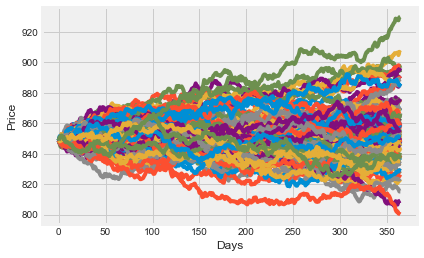

In [34]:
# Running the Monte Carlo simulation a hundred times

start_price = MINDTREE.iloc[0,3]

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price');

In [35]:
# Analysing the Monte Carlo Simulation for 10,000 simulations

runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]
    
# 1 percent impirical quantile or 99% Confidence Interval

q = np.percentile(simulations,1)

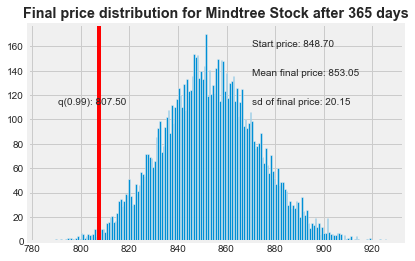

In [36]:
# Plotting the final Risk Analysis plot using Monte Carlo Simulation

plt.hist(simulations,bins=200)

plt.figtext(0.6, 0.8, s="Start price: %.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: %.2f" % simulations.mean())

plt.figtext(0.6, 0.6, "sd of final price: %.2f" % simulations.std())

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): %.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Mindtree Stock after %s days" % days, weight='bold');

- generally frequencies of different outcomes generated by this simulation will form a normal distribution
- The most likely return is in the middle of the curve, meaning there is an equal chance that the actual return will be higher or lower than that value.
- The probability that the actual return will be within one standard deviation of the most probable ("expected") rate is 68%, while the probability that it will be within two standard deviations is 95%, and that it will be within three standard deviations 99.7%

# 9. Finding the average and median values of the column 'Volume' for each of the types of 'Trend' in each stock

In [37]:
count=0
for i in company_list:
    #grouping by trend and calculating the meand and the median of volume of that trend
    
    avg_median_trendwise = i.groupby(by="Trend")["Volume"].agg(['mean','median']).rename(columns={'mean':'average'})
    print(names_list[count])
    count+=1
    print(avg_median_trendwise)
    print()

LTI
                           average    median
Trend                                       
Bear drop            260896.500000  207466.5
Among top losers     347016.857143  270725.5
Negative             225728.737179  180422.5
Slight negative      151573.835616  110602.0
Slight or No change  161529.568306  138044.0
Slight positive      176112.600000  149117.0
Positive             273345.381579  207256.5
Among top gainers    607192.578947  399879.0
Bull run             956896.000000  659006.0

MINDTREE
                          average     median
Trend                                       
Bear drop            3.210048e+06  1359731.5
Among top losers     1.760062e+06  1296888.0
Negative             1.110875e+06   838557.0
Slight negative      8.727128e+05   692667.5
Slight or No change  7.834572e+05   642877.0
Slight positive      1.037959e+06   910296.0
Positive             1.314093e+06  1071239.0
Among top gainers    2.247741e+06  1941360.0
Bull run             4.501073e+06  441231

# 10.analysis of trend using pie chart,bar plot(only for 1 stock)

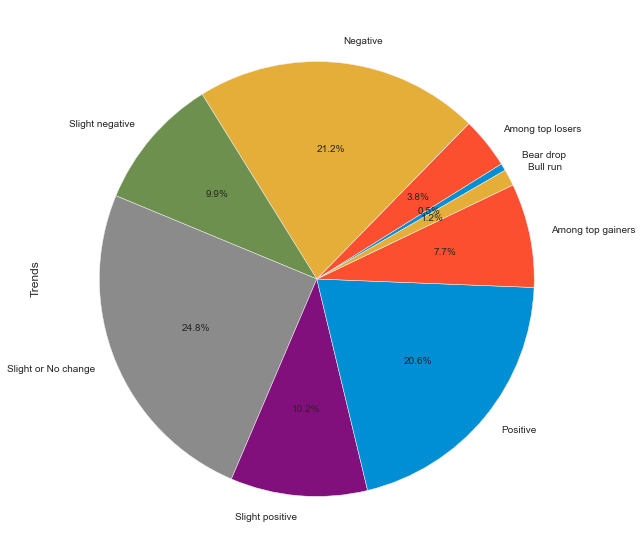

In [38]:
# Grouping stock data 'Trend' wise of lti stock

stock_data_trendwise = company_list[0].groupby('Trend')

# Ploting Pie chart for only lti stock
stock_data_trendwise.size().plot.pie(figsize=(10,10),autopct='%1.1f%%', startangle=30, radius=1)
plt.ylabel('Trends')
plt.show()

###  LTI has very small bull run and bear drop means it doesn't gives too high and too low returns it mostly fluctuate between positive, negative, or no change.
### This is exactly what expected from a large cap company

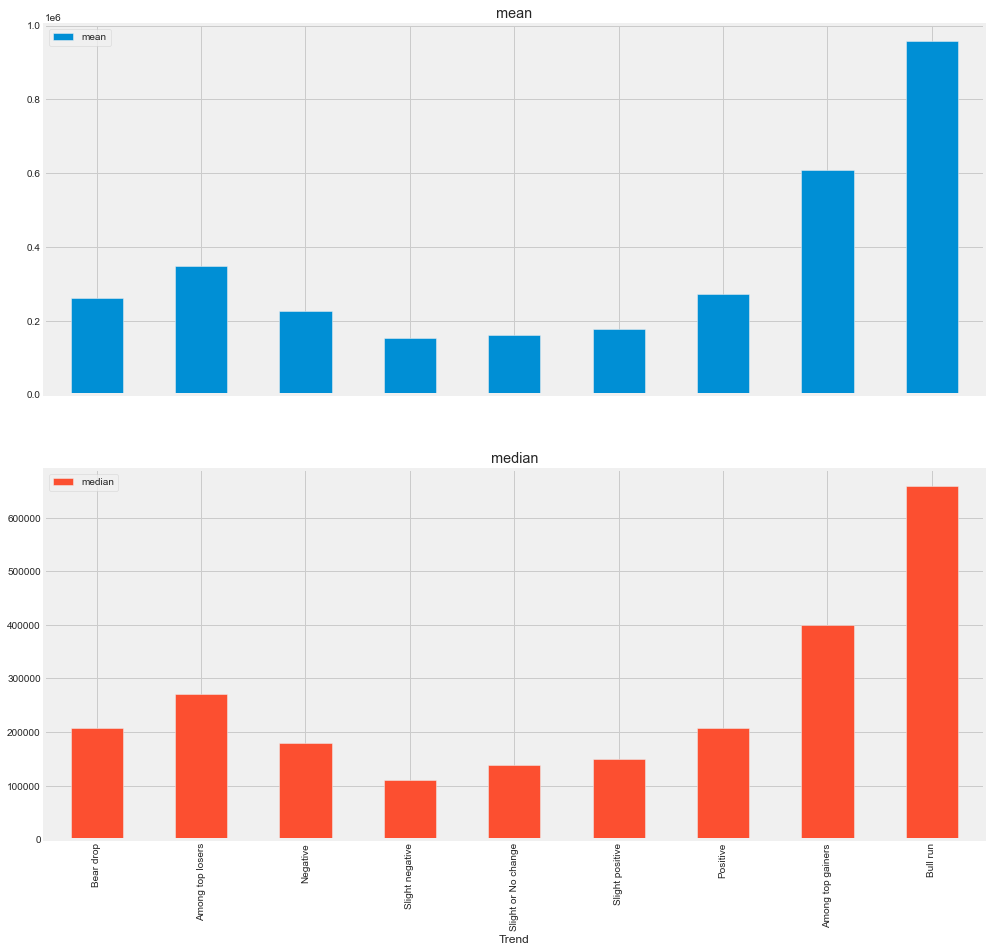

In [39]:
#BAR plot of average & median values of the 'Volume' by Trend type of lti stock

mean_median = stock_data_trendwise['Volume'].agg(['mean', 'median'])
# Bar plot of mean and median w.r.t to Trends
mean_median[['mean','median']].plot(kind='bar', subplots=True, figsize=(15,15))
plt.show()

### Finding months with highest percentage of Top gains 

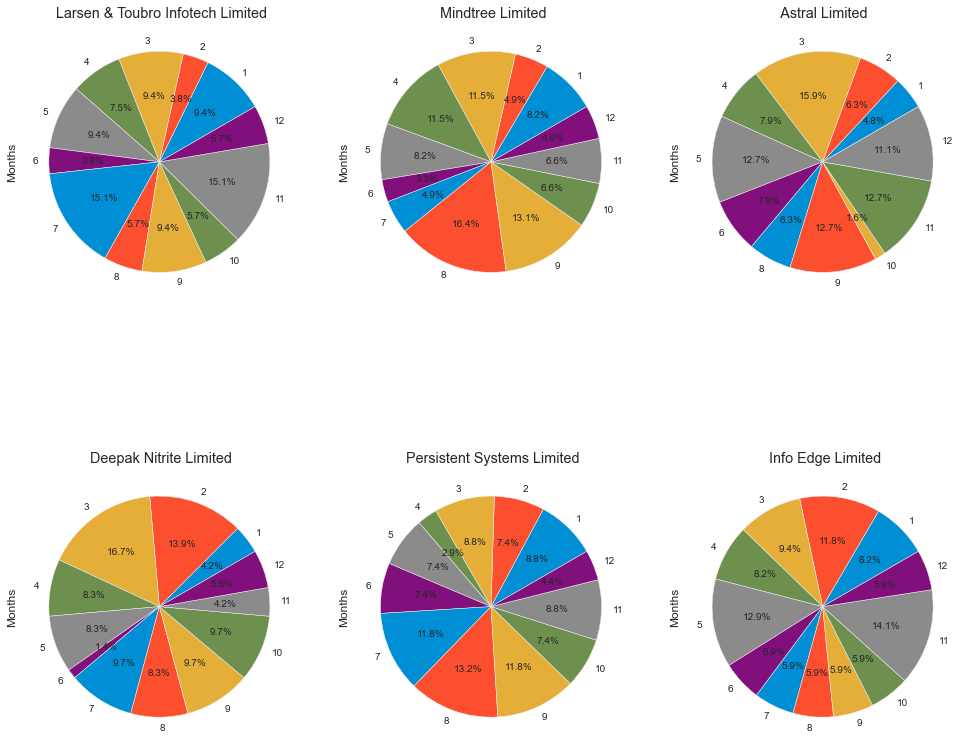

<Figure size 432x288 with 0 Axes>

In [79]:
#plt.figure(figsize=(15, 6))
#plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 3, i)
    x = company.query("Trend == 'Among top gainers'")
    y = x.groupby("Month")
    y.size().plot.pie(figsize=(15,15),autopct='%1.1f%%', startangle=30, radius=1)
    plt.ylabel("Months")
    plt.title(f" {company_name[i - 1]}")
plt.show()
    
plt.tight_layout()

#### From above pie charts we can find months with highest stock price

# 11.Trade Calls - Using Bollinger Bands

- A Bollinger Band is a technical analysis tool defined by a set of trendlines plotted two standard deviations (positively and negatively) away from a simple moving average (SMA) of a stocks price, but which can be adjusted to user preferences.

- There are three lines that compose Bollinger Bands: A simple moving average (middle band) and an upper and lower band.

-  A 14-day moving average would average out the closing prices for the first 14 days as the first data point.


- Bollinger bands are extremely reliable , with a 95% accuracy at 2 standard deviations.

In [41]:
# Calculating 14 days moving average mean  for lti stock data

company_list[0]['SMA_14'] = company_list[0]['Adj Close'].rolling(14).mean()

# Calculating Standard deviation for 14 days for lti stock data

company_list[0]['SD_14'] = company_list[0]['Adj Close'].rolling(14).std()

In [42]:
#calculating upper band value for lti stock data

# Upper Bollinger Bands = Mean + 2*SD

company_list[0]['upper_band'] = company_list[0].SMA_14 + 2*company_list[0].SD_14

#calculating lower band value for lti stock data

# Lower Bollinger Bands = Mean - 2*SD

company_list[0]['lower_band'] = company_list[0].SMA_14 - 2*company_list[0].SD_14

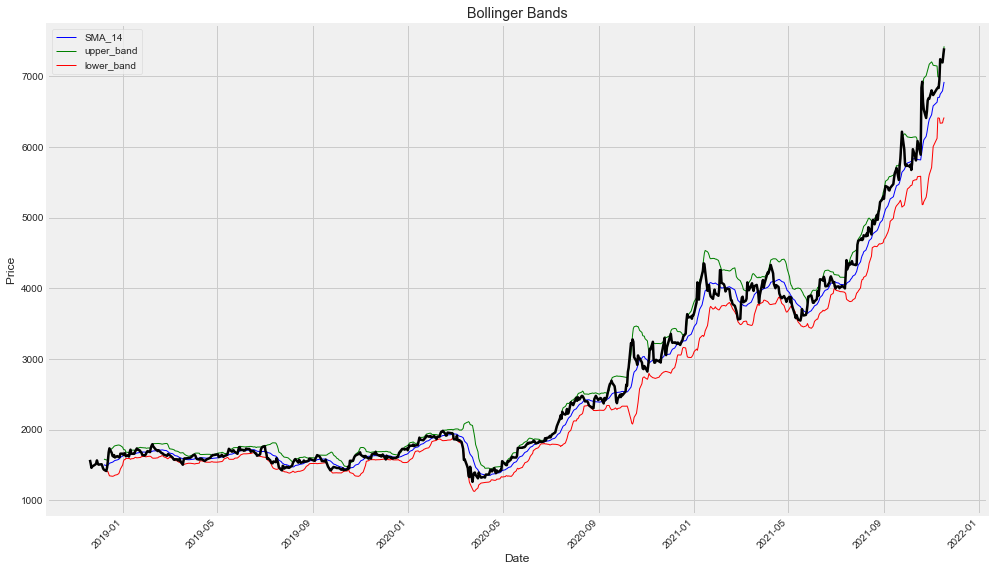

In [43]:
#Plotting Bollinger Bands for LTI

company_list[0][['SMA_14', 'upper_band', 'lower_band']].plot(figsize=(15,10), linewidth=1, color=['b', 'g', 'r'])
company_list[0]['Adj Close'].plot(figsize=(15,10), linewidth=2.5, color='k')
plt.title("Bollinger Bands")
plt.ylabel('Price ')
plt.xticks(rotation=45)
plt.show()

- Many traders believe the closer the prices move to the upper band, the more overbought the market, and the closer the prices move to the lower band, the more oversold the market.
- We can observe that for most part closing price is between upper and lower bands means there is no issue of overbought and oversold the market.

# 12. Trade Call Prediction using Classification

Created a new column 'Call' , whose entries are -

- 'Buy' if the stock price is below the lower Bollinger band
- 'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band
- 'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band
- 'Short' if the stock price is above the upper Bollinger band

Now we will train different classification model with the 3 bollinger columns and the stock price as inputs and 'Calls' as output.


In [44]:
LTI.dropna(inplace=True)

#function to return type of call based on close ,lower,avg,upper values

def classifying_call(close,lower,avg,upper):
    if close <= lower:
        return 'Buy'
    if (close > lower) and (close <= avg):
        return 'Hold Buy/Liquidate Short'
    elif (close > avg) and (close <= upper):
        return 'Hold Short/Liquidate Buy'
    elif close > upper:
        return 'Short'

#adding call column to LTI dataframe

LTI["Call"] = LTI.apply(lambda record : classifying_call(record['Close'], record['lower_band'], record['SMA_14'], record['upper_band']), axis = 1)

#string inputs to our classification model in a input dataframe

Input = LTI[['lower_band','SMA_14','upper_band','Close']]

#importing req modules

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#converting categorical call values into numeric values(numbered labels)

label_encoder = preprocessing.LabelEncoder()
numbered_label = label_encoder.fit_transform(LTI.Call.ravel())

#storing the numbered labels of call in output dataframe

Output = pd.DataFrame(numbered_label)


#splittig data into test and train in the ratio 0.2:0.8

X_train, X_test,y_train, y_test = train_test_split(Input, Output, test_size=0.2)

#reshaping the data

y_train = y_train.values.reshape(len(y_train))
y_test = y_test.values.reshape(len(y_test))

#creating a dataframe to store the test and train accuracy of each classifier

classifers_train_test = pd.DataFrame(columns=["Classifier","Train_AUC", "Test_AUC"])

#gaussian naive bayes classifier
gaussian_classifier = GaussianNB()
#training
gaussian_classifier.fit(X_train, y_train)
#calculating train accuracy
training_accuracy = gaussian_classifier.score(X_train, y_train).round(2)
#calculating test accuracy
testing_accuracy = gaussian_classifier.score(X_test, y_test).round(2)
#storing classifier name ,its training and test accuracy in the dataframe
classifers_train_test.loc[0] = ["Naive Bayes", training_accuracy, testing_accuracy]


#logistic regression
lr = LogisticRegression(max_iter=10000,class_weight='balanced', multi_class="ovr", solver='liblinear')
#training
lr.fit(X_train, y_train)
#calculating train accuracy
training_accuracy = lr.score(X_train, y_train).round(2)
#calculating test accuracy
testing_accuracy = lr.score(X_test, y_test).round(2)
#storing classifier name ,its training and test accuracy in the dataframe
classifers_train_test.loc[1] = ["Logistic Regression", training_accuracy, testing_accuracy]


#svm classifier
svm_classifier = SVC(verbose=True, gamma='scale',class_weight='balanced')
#training
svm_classifier.fit(X_train, y_train)
#calculating train accuracy
training_accuracy = svm_classifier.score(X_train, y_train).round(2)
#calculating test accuracy
testing_accuracy = svm_classifier.score(X_test, y_test).round(2)
#storing classifier name ,its training and test accuracy in the dataframe
classifers_train_test.loc[2] = ["SVM", training_accuracy, testing_accuracy]


#k nearest neighbours classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
#training
knn_classifier.fit(X_train, y_train)
#calculating train accuracy
training_accuracy = knn_classifier.score(X_train, y_train).round(2)
#calculating test accuracy
testing_accuracy = knn_classifier.score(X_test, y_test).round(2)
#storing classifier name ,its training and test accuracy in the dataframe
classifers_train_test.loc[3] = ["KNN", training_accuracy, testing_accuracy]


#random forest classifier
rf_classifier = RandomForestClassifier(max_depth =3, n_estimators = 10,class_weight='balanced')
#training
rf_classifier.fit(X_train, y_train)
#calculating train accuracy
training_accuracy = rf_classifier.score(X_train, y_train).round(2)
#calculating test accuracy
testing_accuracy = rf_classifier.score(X_test, y_test).round(2)
#storing classifier name ,its training and test accuracy in the dataframe
classifers_train_test.loc[4] = ["Random Forest", training_accuracy, testing_accuracy]

print()
print(classifers_train_test)

[LibSVM]
            Classifier  Train_AUC  Test_AUC
0          Naive Bayes       0.50      0.46
1  Logistic Regression       0.96      0.96
2                  SVM       0.46      0.40
3                  KNN       0.93      0.85
4        Random Forest       0.56      0.52


- Logistic regression gives the best accuracy we use this classification model

#### predicting the call type on other stock data using the already trained logistic regression model

In [45]:
#Calculating 14 days moving average mean  for DEEPAKNTR stock data

rolling_avg = DEEPAKNTR['Close'].rolling(window=14).mean()

#Calculating 14 days moving average sd  for DEEPAKNTR stock data

rolling_std = DEEPAKNTR['Close'].rolling(window=14).std()

#calculating the bollinger bands for DEEPAKNTR stock data

DEEPAKNTR['lower'] = rolling_avg-2*rolling_std
DEEPAKNTR['avg'] = rolling_avg
DEEPAKNTR['upper'] = rolling_avg+2*rolling_std
DEEPAKNTR.dropna(inplace=True)

#adding call column 

DEEPAKNTR["Call"] = DEEPAKNTR.apply(lambda record : classifying_call(record['Close'], record['lower'], record['avg'], record['upper']), axis = 1)

#seperating input to classification model

Input = DEEPAKNTR[['lower','avg','upper','Close']]

#converting call column to numbered labels

label_encoder = preprocessing.LabelEncoder()
numbered_label = label_encoder.fit_transform(DEEPAKNTR.Call.ravel())

#seperating the output

Output = pd.DataFrame(numbered_label)

#calling trained logistic regression with the inputs to predict output

output_pred = lr.predict(Input)

#calculating the accuracy score

lr.score(Input, Output)

0.7439544807965861

# 13.Beta Calculation using regression

- The `Beta` of an asset is a measure of the sensitivity of its returns relative to a market benchmark.How sensitive/insensitive is the returns of an asset to the overall market returns. What happens when the market jumps, does the returns of the asset jump accordingly or jump somehow?

In [46]:
#The daily Beta value for the past 3 months

months = 3
days = months * 21

# Taking 'LTI' Stock of past 3 months
lti_stock = LTI.tail(days)

# Taking Nifty50 index of past 3 months
nifty_stock = NIFTY.tail(days)

In [47]:
# Daily Returns of lti stock for last 3 months
lti_daily_return = lti_stock['Close'].pct_change().dropna()

# Daily Returns of Nifty50 index for last 3 months
nifty_daily_return = nifty_stock['Close'].pct_change().dropna()

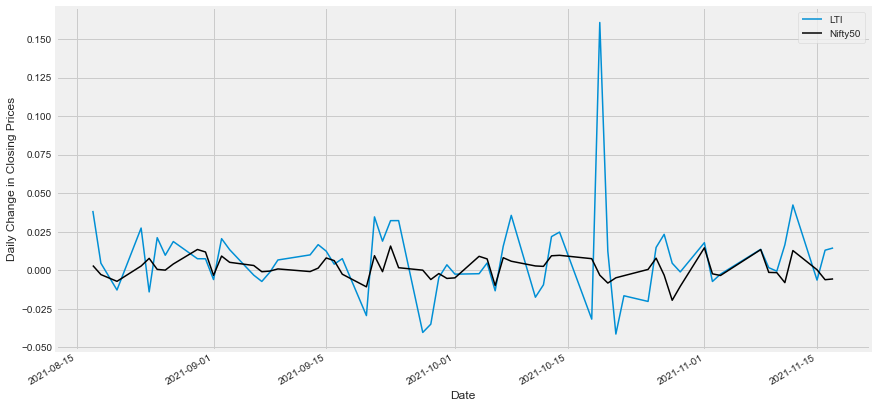

In [48]:
lti_daily_return.plot(figsize=(13,7),label='LTI', linewidth=1.5)
nifty_daily_return.plot(color='k', figsize=(13,7), label='Nifty50', linewidth=1.5)
plt.ylabel("Daily Change in Closing Prices")
plt.legend()
plt.show()

In [49]:
# Reshaping for Regression Purpose
lti_daily_return = lti_daily_return.ravel().reshape(-1,1)
nifty_daily_return = nifty_daily_return.ravel().reshape(-1,1)

#Calculating Daily Beta value using Linear Regression
daily_beta_regressor = LinearRegression()
daily_beta_regressor.fit(nifty_daily_return, lti_daily_return)

# Beta Value
daily_beta_regressor.coef_.item()

0.8253643357019114

### LTI beta value is 0.83 it means that it is less volatile with respect to  market that we can also see in the above graph which is good for long term investment. 

## taking total 20 comapnies for analysis from here on

In [50]:
additional_names_list=['VENKEYS','TATASTLLP','JKTYRE','RAYMOND','TATAMETALI','TCS','COGNIZANT','INFOSYS','HCL','WIPRO','ONGC','RAJESHEXPORTS','ICICI','HDFC']

In [51]:
VENKEYS=pd.read_csv(r'VENKEYS.csv',parse_dates=['Date'])
TATASTLLP=pd.read_csv(r'TATASTLLP.csv',parse_dates=['Date'])
JKTYRE=pd.read_csv(r'JKTYRE.csv',parse_dates=['Date'])
RAYMOND=pd.read_csv(r'RAYMOND.csv',parse_dates=['Date'])
TATAMETALI=pd.read_csv(r'TATAMETALI.csv',parse_dates=['Date'])
TCS=pd.read_csv(r'TCS.csv',parse_dates=['Date'])
COGNIZANT=pd.read_csv(r'COGNIZANT.csv',parse_dates=['Date'])
INFOSYS=pd.read_csv(r'INFOSYS.csv',parse_dates=['Date'])
HCL=pd.read_csv(r'HCL.csv',parse_dates=['Date'])
WIPRO=pd.read_csv(r'WIPRO.csv',parse_dates=['Date'])
ONGC=pd.read_csv(r'ONGC.csv',parse_dates=['Date'])
RAJESHEXPORTS=pd.read_csv(r'RAJESHEXPORTS.csv',parse_dates=['Date'])
ICICI=pd.read_csv(r'ICICI.csv',parse_dates=['Date'])
HDFC=pd.read_csv(r'HDFC.csv',parse_dates=['Date'])

In [52]:
additional_company_list=[VENKEYS,TATASTLLP,JKTYRE,RAYMOND,TATAMETALI,TCS,COGNIZANT,INFOSYS,HCL,WIPRO,ONGC,RAJESHEXPORTS,ICICI,HDFC]

In [53]:
#Checking Beta for all 20 Stocks
months = 3
days = months * 21
minn = 100
minn_stock = ''
maxx = -100
maxx_stock = ''


#combinting all the 30 stocks dataframes and names into one list

total_list=[]
total_names=[]
count=0
for i in company_list:
    total_list.append(i)
    total_names.append(names_list[count])
    count+=1
count=0
for i in additional_company_list:
    total_list.append(i)
    total_names.append(additional_names_list[count])
    count+=1
count=0


for i in total_list:
    
    # Daily Returns of current stock for last 3 months
    curr_stock=i.tail(days)
    stock_daily_return = curr_stock['Close'].pct_change().dropna().ravel().reshape(-1,1)
    
    # Daily Returns of Nifty50 index for last 3 months
    nifty_stock=NIFTY.tail(days)
    nifty_daily_return = nifty_stock['Close'].pct_change().dropna().ravel().reshape(-1,1)
    
    #fitting the data using linearregression
    
    daily_beta_regressor = LinearRegression()
    daily_beta_regressor.fit(nifty_daily_return, stock_daily_return)
    
    #getting the beta value
    
    beta = daily_beta_regressor.coef_.item()
    
    #storing the max and min beta value among all the companies
    
    if beta < minn:
        minn = beta
        minn_stock = total_names[count]
    elif beta > maxx:
        maxx = beta
        maxx_stock = total_names[count]
    print(total_names[count]," : ", daily_beta_regressor.coef_.item(), "\n")
    count+=1
    
print("Maximum : ", maxx_stock," : ", maxx)
print("Minimum : ", minn_stock," : ", minn)

LTI  :  0.8253643357019114 

MINDTREE  :  1.5404618605459355 

ASTRAL  :  0.8537052281382472 

DEEPAKNTR  :  2.029719871289052 

PERSISTENT  :  1.209434571721443 

NAUKRI  :  1.3168618344118181 

VENKEYS  :  0.8361661444622378 

TATASTLLP  :  1.297805321692366 

JKTYRE  :  1.2877548246135266 

RAYMOND  :  0.6681883793467276 

TATAMETALI  :  0.8876490495460444 

TCS  :  0.8250977891011462 

COGNIZANT  :  -0.04015247277635785 

INFOSYS  :  0.18844583350591915 

HCL  :  0.9654802735798563 

WIPRO  :  1.2526533969856035 

ONGC  :  1.333977054863353 

RAJESHEXPORTS  :  0.02438923522948649 

ICICI  :  1.0446891487316374 

HDFC  :  0.8024363136382441 

Maximum :  DEEPAKNTR  :  2.029719871289052
Minimum :  COGNIZANT  :  -0.04015247277635785



#### What if it beta was negative ? 
A negative beta correlation would mean an investment that moves in the opposite direction from the stock market. When the market rises, then a negative-beta investment generally falls. When the market falls, then the negative-beta investment will tend to rise.

#### Inferences from the Beta Values and Regression results

- Beta measures the volatility of a stock compared with the volatility of the market as a whole.
- A high beta means the stock price will move faster than a stock with low beta. High beta means high volatility, but also the possibility of high returns.
- β=0: indicates no correlation with NIFTY or some chosen Index/Benchmark.
- β=1: shows a stock has equally sensitive as the market.
- β> 1: indicates a stock that’s more volatile/unstable than NIFTY.
- β< 1: shows less sensitive than NIFTY
- 1.45 is 45% more sensitive than NIFTY


- We can observe that companies like `Raymond`, `Venkeys` are very less volatile.
- Companies like `Deepakntr`,`Mindtree` are relatively more volatile.

It shows DEEPAKNTR stock is very volatile.
It very nice option for Intraday trading but not for long term trading.
Due to high volatility we can get a very big return on investment 

# 14. Diversification analysis using Clustering 

Clustering is a method of unsupervised learning and is a common technique for statistical data analysis used in many fields.

Clustering is a Machine Learning technique that involves the grouping of data points. Given a set of data points, we can use a clustering algorithm to classify each data point into a specific group. In theory, data points that are in the same group should have similar properties and/or features, while data points in different groups should have highly dissimilar properties and/or features.

In financial Markets, Cluster analysis is a technique used to group sets of objects that share similar characteristics. It is common in statistics, but investors will use the approach to build a diversified portfolio. Stocks that exhibit high correlations in returns fall into one basket, those slightly less correlated in another, and so on, until each stock is placed into a category.

In [54]:
#storing close price of all 20 stocks in a close dataframe

close_price = pd.DataFrame([])
count=0
for i in total_list:
    close_price[total_names[count]] = i["Close"].reset_index(drop=True)
    count+=1

In [55]:
close_price.head()

,LTI,MINDTREE,ASTRAL,DEEPAKNTR,PERSISTENT,NAUKRI,VENKEYS,TATASTLLP,JKTYRE,RAYMOND,TATAMETALI,TCS,COGNIZANT,INFOSYS,HCL,WIPRO,ONGC,RAJESHEXPORTS,ICICI,HDFC
0,1688.20,848.70,617.73,223.35,558.75,1385.05,2413.40,691.38,105.60,782.10,684.05,1902.45,69.21,9.29,520.05,249.64,154.55,569.75,362.40,1006.95
1,1755.65,836.50,627.84,220.80,551.35,1400.30,2391.35,676.19,103.45,789.10,666.00,1878.25,67.61,9.09,504.48,240.98,153.10,569.90,357.90,1006.22
2,1789.90,830.40,623.40,221.85,540.70,1401.75,2396.65,678.79,103.20,804.50,658.10,1812.00,68.67,9.07,492.58,235.61,151.75,570.70,356.75,1009.38
3,1731.20,828.85,632.34,215.30,554.05,1393.35,2377.25,673.54,102.75,814.85,652.40,1812.55,67.98,9.09,489.52,230.33,152.25,570.85,352.05,1002.75
4,1729.20,837.10,634.35,217.60,564.30,1454.90,2402.20,665.73,102.25,808.15,640.75,1846.10,68.75,9.18,500.25,238.84,146.60,570.90,356.35,1024.90


In [56]:
#Calculating average annual percentage return and volatility of all 20 stocks over a theoretical one year period

one_yr_clse_prc = close_price.tail(252).reset_index(drop=True)
daily_perc_return = one_yr_clse_prc.pct_change(fill_method='ffill').dropna()*100

# Average Annual Percentage Return

annual_perc_return = daily_perc_return.mean()
annual_perc_return.head()

LTI           0.353452
MINDTREE      0.516446
ASTRAL        0.406829
DEEPAKNTR     0.466523
PERSISTENT    0.478843
dtype: float64

In [57]:
#Annual Percentage Volatility

annual_volatility = daily_perc_return.std()
annual_volatility.head()

LTI           2.431685
MINDTREE      2.265486
ASTRAL        2.630885
DEEPAKNTR     2.654611
PERSISTENT    2.294981
dtype: float64

In [58]:
# Dataframe with column annual returns and annual volatilities
clustering_data = pd.DataFrame({'Returns':annual_perc_return, 'Volatilities':annual_volatility})

### Elbow Curve Method: To decide no of clusters

In [59]:
from sklearn.cluster import KMeans

# defining  max clusters we want to test

cluster_num = 7

# creating the dataframe that will contains all our relevant information for each cluster size

diff_cluster_result = pd.DataFrame(index=pd.np.arange(2,cluster_num+1), 
                                   columns=['loss', 'score','center_returns', 'center_volatility', 'cluster_label', 'model'])

for k in range(2, cluster_num+1):
    
    # create an instance of the model for that k value, and fit the training data to it.
    kmeans = KMeans(n_clusters=k, random_state=0).fit(clustering_data)
    
    # Loss/Distortion: Sum of distances of samples to their closest cluster center.
    
    diff_cluster_result['loss'][k] = kmeans.inertia_
    diff_cluster_result['center_returns'][k] = kmeans.cluster_centers_[:,0]
    diff_cluster_result['center_volatility'][k] = kmeans.cluster_centers_[:,1]
    diff_cluster_result['cluster_label'][k] = kmeans.labels_.astype(float)
    diff_cluster_result['score'][k] = kmeans.score
    diff_cluster_result['model'][k] = kmeans

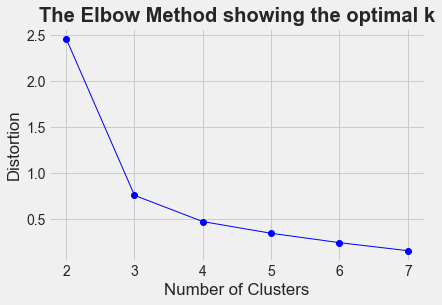

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
with plt.style.context('fivethirtyeight'):
    plt.plot(diff_cluster_result.index.values, diff_cluster_result.loss, 'bo-', linewidth=1)
    plt.xlabel("Number of Clusters")
    plt.ylabel("Distortion")
    plt.title('The Elbow Method showing the optimal k', fontweight='bold')
    plt.show()

 Decide The Number of clusters
From above graph, it looks like 3 or 4 would be better number of cluster.
Let's, plot scatter plot for 3 and 4 cluster. And decide

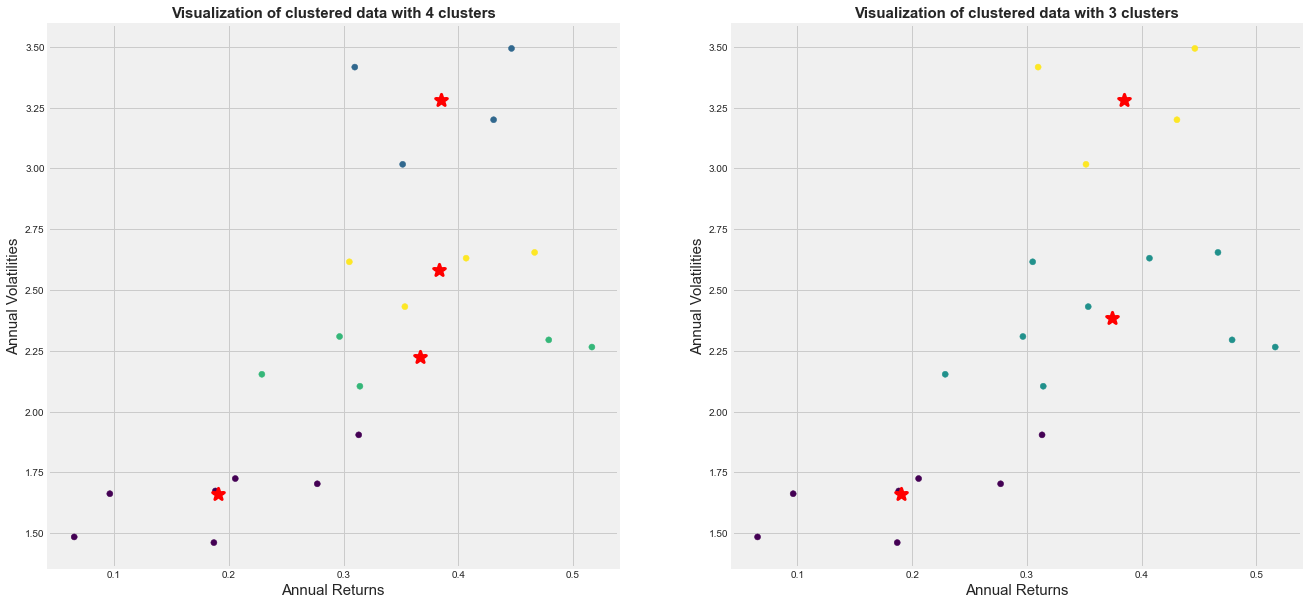

In [61]:
 plt.figure(figsize=(20,10))
for cluster in [4,3]:
    plt.subplot(1,2,cluster%2+1)
    plt.scatter(clustering_data.Returns, clustering_data.Volatilities, c=diff_cluster_result.cluster_label[cluster], cmap='viridis')
    plt.scatter(diff_cluster_result.center_returns[cluster], diff_cluster_result.center_volatility[cluster], marker='*', c='r', s=150, linewidth=3)
    plt.ylabel('Annual Volatilities', fontsize=15)
    plt.xlabel('Annual Returns', fontsize=15)
    plt.title('Visualization of clustered data with {} clusters'.format(cluster), fontweight='bold', fontsize=15)
plt.show()

3 clusters seperation looks better than 4 clusters,so we go for three clusters
### Optimum Number of clusters = 3

In [62]:
k_optimized = 3
kmeans_optimized = diff_cluster_result.loc[k_optimized]

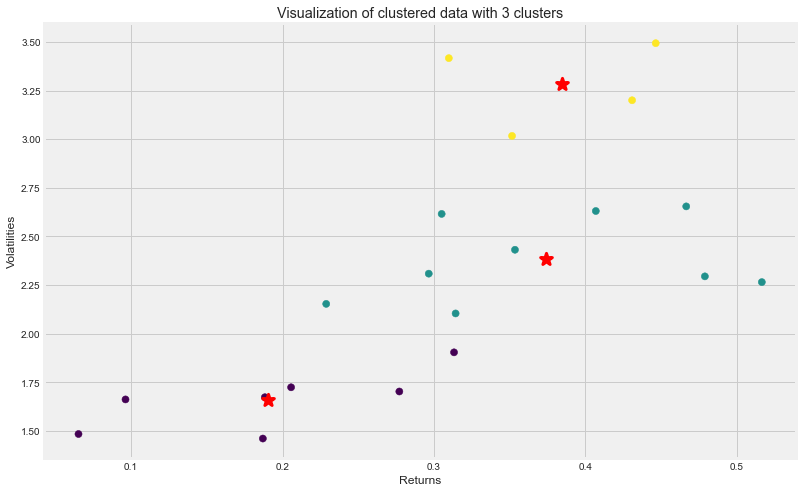

In [63]:
#visualisation of stocks with the optimsl no of cluster
clustering_data.plot(kind='scatter', x='Returns', y='Volatilities', 
                     c=kmeans_optimized.cluster_label, s=50, 
                     cmap='viridis', colorbar=False, figsize=(12,8), 
                     title='Visualization of clustered data with {} clusters'.format(k_optimized))
plt.scatter(kmeans_optimized.center_returns, kmeans_optimized.center_volatility, marker='*', c='r', s=150, linewidths=3)
plt.show()

In [64]:
# Add Cluster number label in Clustering_data dataframe
clustering_data['label'] = diff_cluster_result.cluster_label[k_optimized].astype(int)+1

#  separate Data frame to show which stocks belong to the same cluster 
all_clusters = [i[1] for i in clustering_data.groupby('label')]
cluster1, cluster2, cluster3 = all_clusters

# Display which stocks belongs to which cluster
print("STOCKS IN", "-"*50,sep='\n')
for cluster in all_clusters:
    print(f"Cluster {cluster.label[0]} : ",end=""); print(*cluster.index.values, sep=", ",end='\n\n')

STOCKS IN
--------------------------------------------------
Cluster 1 : TCS, COGNIZANT, INFOSYS, HCL, WIPRO, RAJESHEXPORTS, HDFC

Cluster 2 : LTI, MINDTREE, ASTRAL, DEEPAKNTR, PERSISTENT, NAUKRI, RAYMOND, ONGC, ICICI

Cluster 3 : VENKEYS, TATASTLLP, JKTYRE, TATAMETALI



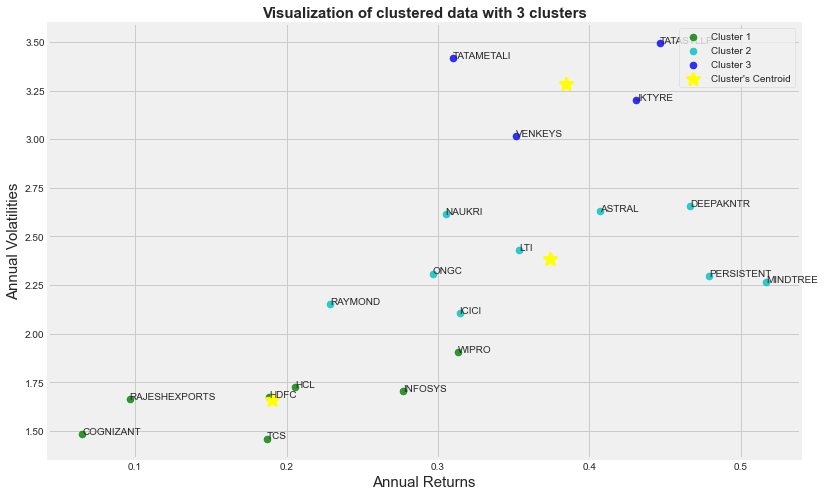

In [65]:
plt.figure(figsize=(12,8))

# Plot all clusters
for i in range(len(all_clusters)):
    plt.scatter(all_clusters[i].Returns, all_clusters[i].Volatilities, s=50, label=f"Cluster {i+1}", c=list('gcbr')[i], alpha=0.8)

# Annotate stock name to each data point
for i in range(len(clustering_data)):
    plt.annotate(clustering_data.index[i], (clustering_data.Returns[i], clustering_data.Volatilities[i]))
    
# Plot Centriod of each cluster
plt.scatter(kmeans_optimized.center_returns, kmeans_optimized.center_volatility, marker='*', c='yellow', s=150, linewidth=3, label="Cluster's Centroid")

plt.title("Visualization of clustered data with 3 clusters", fontweight='bold', fontsize=15)
plt.xlabel("Annual Returns", fontsize=15)
plt.ylabel("Annual Volatilities", fontsize=15)
plt.legend()
plt.show()

- We can observe that cluster1 companies are less volatile but also gives us less returns.
- cluster2 companies are relatively high returns that cluster1 and also not so high risky/volatile.(These companies we found above as best companies to invest as they gives high returns and also less risky).
- cluster3 companies gives moderate returns but high risky.
- Someone according to their risk taking capacity can invest in these different cluster companies.
- But best approach will be to split the investment amount and invest in all these cluster according to their risk taking capacity and expected returns.

In [66]:
#cluster1 dataframe

cluster1

,Returns,Volatilities,label
TCS,0.186997,1.461538,1
COGNIZANT,0.065267,1.484802,1
INFOSYS,0.277107,1.703271,1
HCL,0.205637,1.724848,1
WIPRO,0.313216,1.904491,1
RAJESHEXPORTS,0.096308,1.662517,1
HDFC,0.188318,1.673820,1


In [67]:
#cluster2 dataframe

cluster2

,Returns,Volatilities,label
LTI,0.353452,2.431685,2
MINDTREE,0.516446,2.265486,2
ASTRAL,0.406829,2.630885,2
DEEPAKNTR,0.466523,2.654611,2
PERSISTENT,0.478843,2.294981,2
NAUKRI,0.305048,2.615956,2
RAYMOND,0.228820,2.153587,2
ONGC,0.296528,2.308895,2
ICICI,0.314256,2.104399,2


- We can see that all are companies are in same group and its obvious too because all are similar kind of companies wrt returns and market volatilities

In [68]:
#cluster3 dataframe

cluster3

,Returns,Volatilities,label
VENKEYS,0.351522,3.016837,3
TATASTLLP,0.446389,3.493344,3
JKTYRE,0.430782,3.200032,3
TATAMETALI,0.309790,3.416488,3


# 15. Prediction of closing price of mindtree stock:

- Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture used in the field of deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections
- LSTM networks are well-suited to classifying, processing and making predictions based on time series data, since there can be lags of unknown duration between important events in a time series

In [69]:
#reading mindtree data from 2012

df=pd.read_csv(r'MINDTREE-PREDICTION.csv',parse_dates=['Date'])
df= df.set_index('Date')
df['Date']=df.index

In [70]:
# Creating a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Converting the dataframe to a numpy array
dataset = data.values
# Getting the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .80))

# Scaling the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Creating the training data set 
# Creating the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Splitting the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
        
# Convertting the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshaping the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [74]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Building the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1884/1884 [==============================] - 83s 40ms/step - loss: 1.1219e-04


In [75]:
# Creating the testing data set
# Creating a new array containing scaled values 
test_data = scaled_data[training_data_len - 60: , :]
# Creating the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Converting the data to a numpy array
x_test = np.array(x_test)

# Reshaping the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Getting the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Getting the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

153.36865154464107

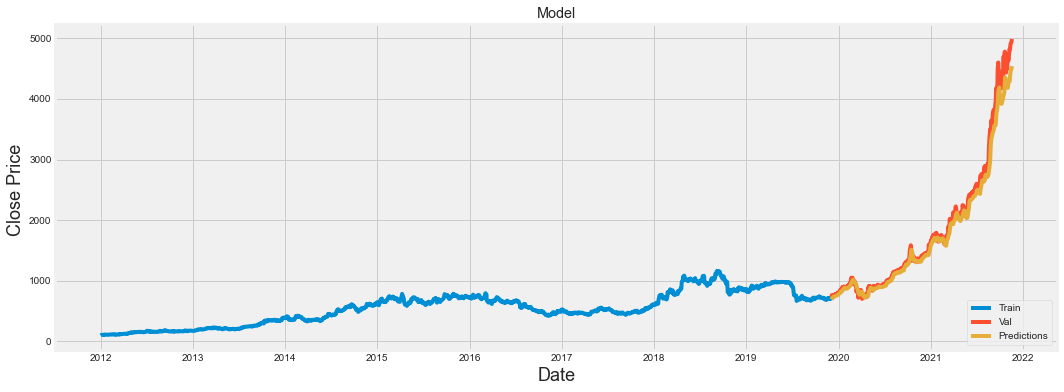

In [76]:
# Plotting the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualizing the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()